# 1. Computing Probabilities Using Python
## 1.1. Sample Space Analysis: An Equation-Free Approach for Measuring Uncertainty in Outcomes


A coin-flip will produce one of 2 measurable outcomes: _Heads_ or _Tails_. By storing outcomes in a Python set, we can create a **sample space** of coin-flips.

**Listing 1. 1. Creating a Sample Space of Coin-Flips**

In [2]:
sample_space = {'Heads', 'Tails'}

All outcomes within `sample_space` share an identical probability, which is equal to `1 / len(sample_space)`.

**Listing 1. 2. Computing the probability of heads**

In [3]:
probability_heads = 1 / len(sample_space)
print(f'Probability of choosing heads is {probability_heads}')

Probability of choosing heads is 0.5


The probability of choosing `'Heads'` equals 0.5. What is the probability that the coin lands on either heads or on
tails? To find rigorous answers, we’ll need to define the
concept of an **event**. An event is the subset of those elements within sample_space that
satisfy some event condition. An **event condition** is a simple Boolean function whose input
is a single sample_space element.

**Listing 1. 3. Defining event conditions**

In [4]:
def is_heads_or_tails(outcome):  return outcome in {'Heads', 'Tails'}
def is_neither(outcome): return not is_heads_or_tails(outcome)

Also, for completeness-sake, lets define event conditions for the two basic events in which the coin satisfies exactly one of our two potential outcomes.

**Listing 1. 4. Defining additional event conditions**

In [5]:
def is_heads(outcome): return outcome == 'Heads'
def is_tails(outcome): return outcome == 'Tails'

We can pass event conditions into a generalized `get_matching_event` function. The
function iterates through `generic_sample_space` and returns the set of outcomes where
`event_condition(outcome)` is `True`.

**Listing 1. 5. Defining an event detection function**

In [6]:
def get_matching_event(event_condition, generic_sample_space):
    return set([outcome for outcome in generic_sample_space
                if event_condition(outcome)])

Lets execute `get_matching_event` on our 4 event conditions.

**Listing 1. 6. Detecting events using event conditions**

In [7]:
event_conditions = [is_heads_or_tails, is_heads, is_tails, is_neither]

for event_condition in event_conditions:
    print(f"Event Condition: {event_condition.__name__}")
    event = get_matching_event(event_condition, sample_space)
    print(f'Event: {event}\n')

Event Condition: is_heads_or_tails
Event: {'Heads', 'Tails'}

Event Condition: is_heads
Event: {'Heads'}

Event Condition: is_tails
Event: {'Tails'}

Event Condition: is_neither
Event: set()



We’ve successfully extracted 4 events from `sample_space`. The probability of each event is equal to `len(event) / len(sample_space)`.

**Listing 1. 7. Computing event probabilities**

In [8]:
def compute_probability(event_condition, generic_sample_space):
    event = get_matching_event(event_condition, generic_sample_space)
    return len(event) / len(generic_sample_space)

for event_condition in event_conditions:
    prob = compute_probability(event_condition, sample_space)
    name = event_condition.__name__
    print(f"Probability of event arising from '{name}' is {prob}")

Probability of event arising from 'is_heads_or_tails' is 1.0
Probability of event arising from 'is_heads' is 0.5
Probability of event arising from 'is_tails' is 0.5
Probability of event arising from 'is_neither' is 0.0


### 1.1.1. Analyzing a Biased Coin
Suppose a coin is 4 times more likely to land on heads relative to tails. We can represent that coin as a weighted sample space.

**Listing 1. 8. Representing a weighted sample space**

In [9]:
weighted_sample_space = {'Heads': 4, 'Tails': 1}

Our new sample space is stored within a dictionary. We can redefine sample-space size as the sum of all dictionary weights.

**Listing 1. 9. Checking the weighted sample space size**

In [10]:
sample_space_size = sum(weighted_sample_space.values())
assert sample_space_size == 5

We can redefine event size in similar manner. Each event is a set of outcomes. These outcomes map to weights. Summing over these weights will yield the event size.

**Listing 1. 10. Checking the weighted event size**

In [11]:
event = get_matching_event(is_heads_or_tails, weighted_sample_space)
event_size = sum(weighted_sample_space[outcome] for outcome in event)
assert event_size == 5

Our generalized definitions of sample-space size and event size permit us to create a
`compute_event_probability function.`

**Listing 1. 11. Defining a generalized event probability function**

In [12]:
def compute_event_probability(event_condition, generic_sample_space):
    event = get_matching_event(event_condition, generic_sample_space)
    if type(generic_sample_space) == type(set()):
        return len(event) / len(generic_sample_space)

    event_size = sum(generic_sample_space[outcome]
                     for outcome in event)
    return event_size / sum(generic_sample_space.values())


We can now output all the event probabilities for the biased coin without needing to redefine our 4 event condition functions.

**Listing 1. 12. Computing weighted event probabilities**

In [13]:
for event_condition in event_conditions:
    prob = compute_event_probability(event_condition, weighted_sample_space)
    name = event_condition.__name__
    print(f"Probability of event arising from '{name}' is {prob}")

Probability of event arising from 'is_heads_or_tails' is 1.0
Probability of event arising from 'is_heads' is 0.8
Probability of event arising from 'is_tails' is 0.2
Probability of event arising from 'is_neither' is 0.0


## 1.2. Computing Non-Trivial Probabilities
### 1.2.1. Problem 1: Analyzing a Family with Four Children
Suppose a family has 4 children. What is the probability that exactly 2 of the children are
boys? We’ll find solve this by constructing an unweighted sample space where each outcome is a 4-element tuple
representing one possible sequence of 4 children.

**Listing 1. 13. Computing the sample space of children**

In [14]:
possible_children = ['Boy', 'Girl']
sample_space = set()
for child1 in possible_children:
    for child2 in possible_children:
        for child3 in possible_children:
            for child4 in possible_children:
                outcome = (child1, child2, child3, child4)
                sample_space.add(outcome)

We ran 4 nested for-loops to explore the sequence of 4 births. This is not an efficient use of
code. We can more easily generate our sample space using Python’s build-in `itertools.product` function.

**Listing 1. 14. Computing the sample space using `product`**

In [15]:
from itertools import product
all_combinations = product(*(4 * [possible_children]))
assert set(all_combinations) == sample_space

We can make our code even more efficient by executing `set(product(possible_children, repeat=4))`.

**Listing 1. 15. Passing `repeat` into `product`**

In [16]:
sample_space_efficient = set(product(possible_children, repeat=4))
assert sample_space == sample_space_efficient

Lets calculate the fraction of `sample_space` that is composed of families with 2 boys.

**Listing 1. 16. Computing the probability of 2 boys**

In [17]:
def has_two_boys(outcome): return len([child for child in outcome
                                      if child == 'Boy']) == 2

prob = compute_event_probability(has_two_boys, sample_space)
print(f"Probability of 2 boys is {prob}")

Probability of 2 boys is 0.375


### 1.2.2. Problem 2: Analyzing Multiple Die Rolls
Suppose a die is rolled 6 times. What is the probability that these 6 dice-rolls add up to 21? We’ll begin by defining the possible values of any single roll.

**Listing 1. 17. Defining all possible rolls of a six-sided die**

In [18]:
possible_rolls = list(range(1, 7))
print(possible_rolls)

[1, 2, 3, 4, 5, 6]


Next, we’ll create the sample space for 6 consecutive rolls.

**Listing 1. 18. The sample space for 6 consecutive die rolls**

In [19]:
sample_space = set(product(possible_rolls, repeat=6))

Finally, we’ll define a `has_sum_of_21 event condition` that we’ll subsequently pass into `compute_event_probability`.

**Listing 1. 19. Computing the probability of a die-roll sum**

In [20]:
def has_sum_of_21(outcome): return sum(outcome) == 21

prob = compute_event_probability(has_sum_of_21, sample_space)
print(f"6 rolls sum to 21 with a probability of {prob}")

6 rolls sum to 21 with a probability of 0.09284979423868313


The above analysis can be executed in a single line of code, using Lambda expressions.

**Listing 1. 20. Computing the probability using a lambda expression**

In [21]:
prob = compute_event_probability(lambda x: sum(x) == 21, sample_space)
assert prob == compute_event_probability(has_sum_of_21, sample_space)

### 1.2.3. Problem 3: Computing Die-Roll Probabilities using Weighted Sample Spaces
We’ve just computed the likelihood of 6 die-roolls summing to 21. Now, lets recompute
that probability using a weighted sample space. By mapping the die-roll sums to their occurrence counts, we will produce a `weighted_sample_space result`.

**Listing 1. 21. Mapping die-roll sums to ocurrence counts**

In [22]:
from collections import defaultdict
weighted_sample_space = defaultdict(int)
for outcome in sample_space:
    total = sum(outcome)
    weighted_sample_space[total] += 1

Not all weights in `weighted_sample_space` are equal. Some of the weights are much smaller than others. For instance, there is only one way for the dice to sum to 6.

**Listing 1. 22. Checking very rare die-roll combinations**

In [23]:
assert weighted_sample_space[6] == 1
assert weighted_sample_space[36] == 1

Meanwhile, the value of `weighted_sample_space[21]` is noticeably higher.

**Listing 1. 23. Checking a more common die-roll combination**

In [24]:
num_combinations = weighted_sample_space[21]
print(f"There are {num_combinations } ways for 6 die rolls to sum to 21")

There are 4332 ways for 6 die rolls to sum to 21


There are 4332 ways for 6 die-rolls to sum to 21. This is why a sum of 21 is much more probable than a sum of 6.

**Listing 1. 24. Exploring different ways of summing to 21**

In [25]:
assert sum([4, 4, 4, 4, 3, 2]) == 21
assert sum([4, 4, 4, 5, 3, 1]) == 21

The observed count of 4332 is equal to the length of an unweighted event whose die-rolls add up to 21. Hence, there exists a direct link between unweighted and
weighted event probability computation.

**Listing 1. 25. Comparing weighted events and regular events**

In [26]:
event = get_matching_event(lambda x: sum(x) == 21, sample_space)
assert weighted_sample_space[21] == len(event)
assert sum(weighted_sample_space.values()) == len(sample_space)

The final probability of rolling a 21 should remain unchanged.

**Listing 1. 26. Computing the weighted event probability of die rolls**

In [27]:
prob = compute_event_probability(lambda x: x == 21,
                                 weighted_sample_space)
assert prob == compute_event_probability(has_sum_of_21, sample_space)
print(f"6 rolls sum to 21 with a probability of {prob}")

6 rolls sum to 21 with a probability of 0.09284979423868313


What is the benefit of using a weighted sample space over an unweighted one? Less
memory usage!

**Listing 1. 27. Comparing weighted to unweighted event space size**

In [28]:
print('Number of Elements in Unweighted Sample Space:')
print(len(sample_space))
print('Number of Elements in Weighted Sample Space:')
print(len(weighted_sample_space))

Number of Elements in Unweighted Sample Space:
46656
Number of Elements in Weighted Sample Space:
31


## 1.3. Computing Probabilities Over Interval Ranges
An **interval** is the set of all the numbers that are sandwiched between 2 boundary cutoffs. Lets define an
`is_in_interval` function that checks whether a number falls within a specified interval.

**Listing 1. 28. Defining an interval function**

In [29]:
def is_in_interval(number, minimum, maximum):
    return minimum <= number <= maximum

Given the `is_in_interval` function, we can compute the probability that an event’s
associated value falls within some numeric range. Let’s compute the likelihood
that our 6 consecutive die-rolls sum up to a value between 10 and 21.

**Listing 1. 29. Computing the probability over an interval**

In [30]:
prob = compute_event_probability(lambda x: is_in_interval(x, 10, 21),
                                 weighted_sample_space)
print(f"Probability of interval is {prob}")

Probability of interval is 0.5446244855967078


### 1.3.1. Evaluating Extremes Using Interval Analysis
Suppose we observe 10 flips of an allegedly fair coin, and that coin lands on heads 8 out of 10 times. What is the probability that 10 fair coin-flips produce between 8 and 10 heads? To find out, we'll need the sample space for every possible sequence of 10 flipped coins.

**Listing 1. 30. Computing the sample space for 10 coin-flips**

In [31]:
def generate_coin_sample_space(num_flips=10):
    weighted_sample_space = defaultdict(int)
    for coin_flips in product(['Heads', 'Tails'], repeat=num_flips):
        heads_count = len([outcome for outcome in coin_flips
                          if outcome == 'Heads'])
        weighted_sample_space[heads_count] += 1

    return weighted_sample_space

weighted_sample_space = generate_coin_sample_space()
assert weighted_sample_space[10] == 1
assert weighted_sample_space[9] == 10

We’ll now compute the probability of observing an interval between 8 and 10 heads.

**Listing 1. 31. Computing an extreme head-count probability**

In [32]:
prob = compute_event_probability(lambda x: is_in_interval(x, 8, 10),
                                 weighted_sample_space)
print(f"Probability of observing more than 7 heads is {prob}")

Probability of observing more than 7 heads is 0.0546875


Observing 8 out of 10 tails is as extreme as observing 8 out of 10 heads. What is the probability of observing more than 7 heads or 7 tails?

**Listing 1. 32. Computing an extreme interval probability**

In [33]:
prob = compute_event_probability(lambda x: not is_in_interval(x, 3, 7),
                                 weighted_sample_space)
print(f"Probability of observing more than 7 heads or 7 tails is {prob}")

Probability of observing more than 7 heads or 7 tails is 0.109375


Suppose we flip the coin 10 additional times, and 8 more heads come up. This brings us to 16 heads out of 20 coin-flips. Lets find the probability of 20 fair coin-flips producing more than 15 heads or 15 tails.

**Listing 1. 33. Analyzing extreme head-counts for 20 fair coin-flips**

In [34]:
weighted_sample_space_20_flips = generate_coin_sample_space(num_flips=20)
prob = compute_event_probability(lambda x: not is_in_interval(x, 5, 15),
                                 weighted_sample_space_20_flips)
print(f"Probability of observing more than 15 heads or 15 tails is {prob}")

Probability of observing more than 15 heads or 15 tails is 0.01181793212890625


# 2 Plotting Probabilities Using Matplotlib
## 2.1. Basic Matplotlib Plots
Lets import the Matplotlib plotting library.

**Listing 2. 1. Importing Matplotlib**

In [35]:
import matplotlib.pyplot as plt

We will now plot some linear data using `plt.plot`.

**Listing 2. 2. Plotting a linear relationship**

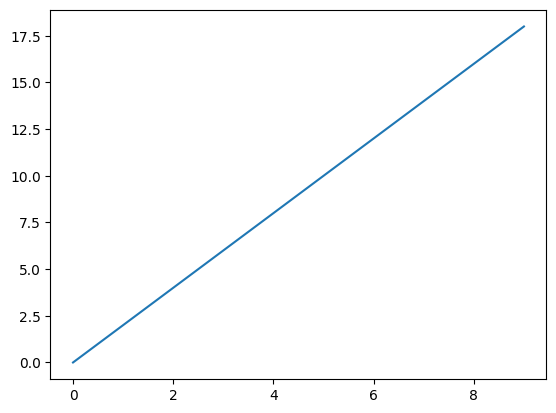

In [36]:
x = range(0, 10)
y = [2 * value for value in x]
plt.plot(x, y)
plt.show()

Our plotted points have been connected using smooth line segments. We can visualize these points individually using the `plt.scatter` method.

**Listing 2. 3. Plotting individual data-points**

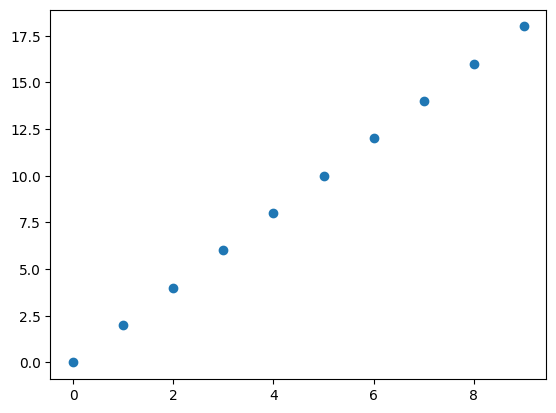

In [37]:
plt.scatter(x, y)
plt.show()

Suppose we want to emphasize the interval where x begins at 2 and ends at 6. We do this by shading the area under the plotted curve over the specified interval, using the `plt.fill_between` method.

**Listing 2. 4. Shading an interval beneath a connected plot.**

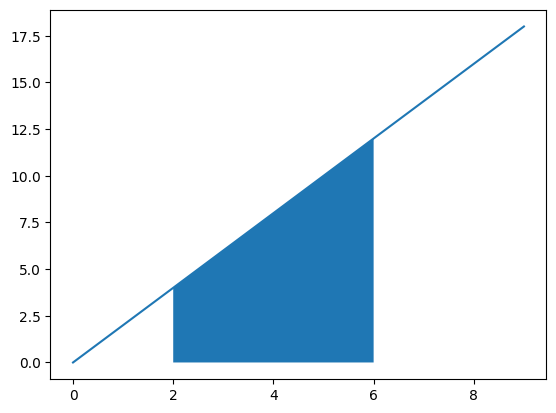

In [38]:
plt.plot(x, y)
where = [is_in_interval(value, 2, 6) for value in x]
plt.fill_between(x, y, where=where)
plt.show()

Lets highlight an interval beneath a continuous line while also exposing individual coordinates.

**Listing 2. 5. Exposing individual coordinates within a continuous plot**

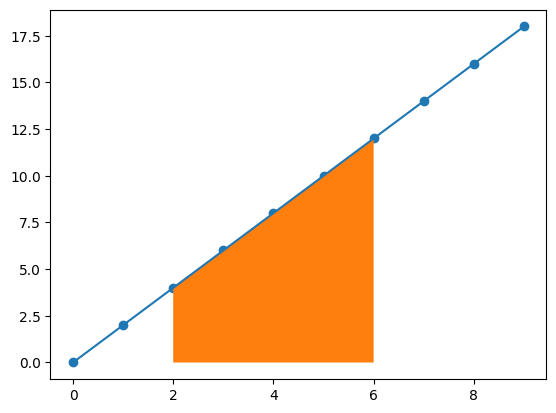

In [39]:
plt.scatter(x, y)
plt.plot(x, y)
plt.fill_between(x, y, where=where)
plt.show()

No data plot is ever truly complete without descriptive x-axis and y-axis labels. Such labels can be set using the `plt.xlabel` and `plt.ylabel` methods.

**Listing 2. 6. Adding axes labels.**

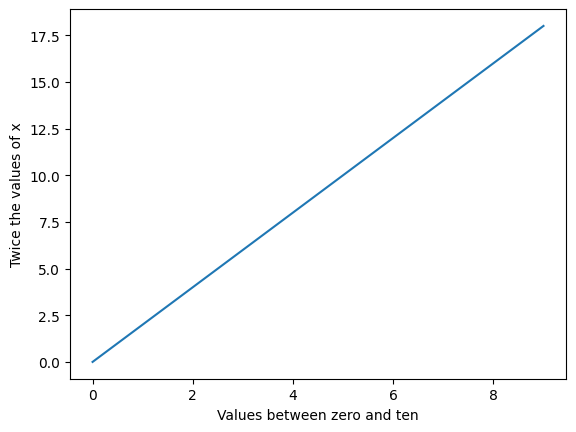

In [40]:
plt.plot(x, y)
plt.xlabel('Values between zero and ten')
plt.ylabel('Twice the values of x')
plt.show()

## 2.2. Plotting Coin-Flip Probabilities

Our aim is to compare the plotted data from `weighted_sample_space` and `weighted_sample_space_20_flips`. We will begin plotting the elements of `weighted_sample_space`. The x-axis will correspond to `'Head-count'`. The y-axis
will correspond to `'Number of coin-flip combinations with x heads'`.

**Listing 2. 7. Plotting the coin-flip weighted sample space**

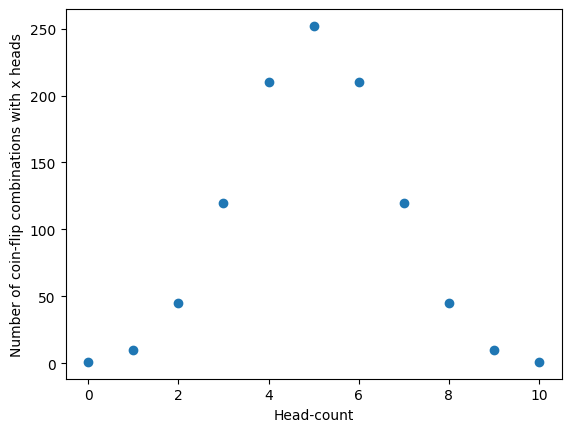

In [41]:
x_10_flips = list(weighted_sample_space.keys())
y_10_flips = [weighted_sample_space[key] for key in x_10_flips]
plt.scatter(x_10_flips, y_10_flips)
plt.xlabel('Head-count')
plt.ylabel('Number of coin-flip combinations with x heads')
plt.show()

Lets plot the probabilities directly on the y-axis. The probability plot will allow us to replace our lengthy y-axis label with a more concisely stated `'Probability'`.

**Listing 2. 8. Plotting the coin-flip probabilities**

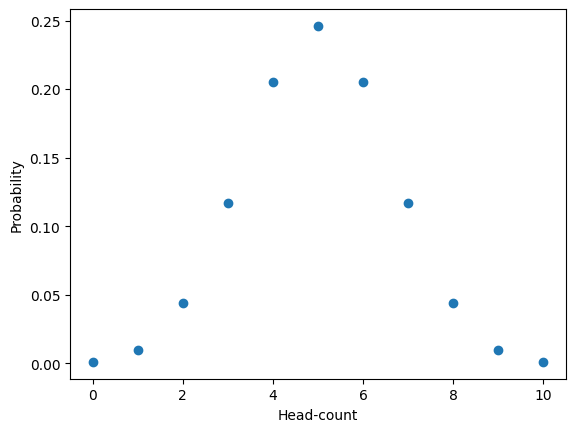

In [42]:
sample_space_size = sum(weighted_sample_space.values())
prob_x_10_flips = [value / sample_space_size for value in y_10_flips]
plt.scatter(x_10_flips, prob_x_10_flips)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

The mapping between x-values and probabilities is called a **probability distribution**. The total area beneath a
probability distribution always equals 1.0.

**Listing 2. 9. Confirming that all probabilities sum to 1.0**

In [43]:
assert sum(prob_x_10_flips) == 1.0

The area beneath the head-count interval of 8 through 10 is equal to the probability of observing 8 heads or more. We can visualize that area using the `plt.fill_between method`.

**Listing 2. 10. Shading the interval under a probability curve**

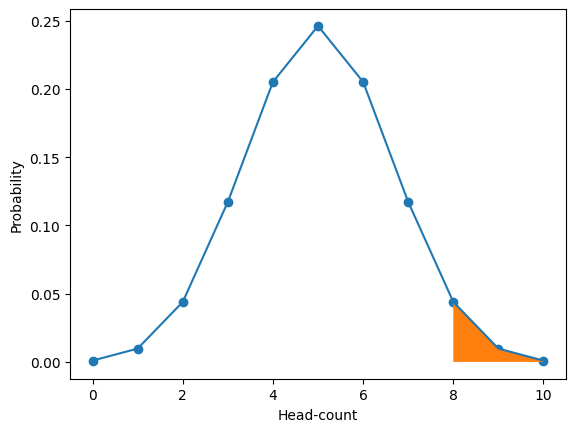

In [44]:
plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
where = [is_in_interval(value, 8, 10) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

Now, lets also the shade the interval demarcating the probability of observing 8 tails or more.

**Listing 2. 11. Shading the interval under the extremes of a probability curve**

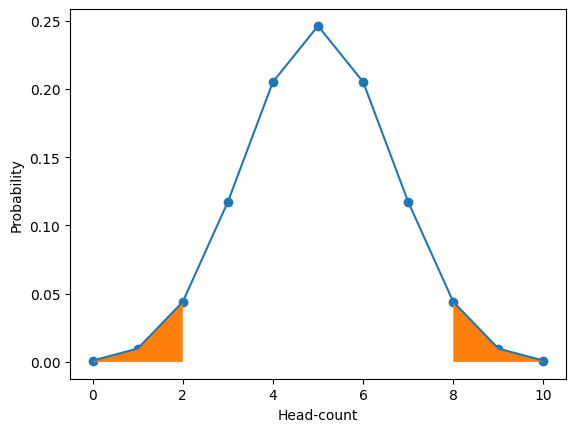

In [45]:
plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
where = [not is_in_interval(value, 3, 7) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

The two symmetrically shaded intervals cover the right and left tail-ends of the coin-flip curve.

### 2.2.1. Comparing Multiple Coin-Flip Probability Distributions
Lets extend our plot to also encompass the distribution for 20 flipped coins. We’ll plot both distributions on a single figure, though first we must compute the x-axis head-counts and y-axis probabilities for the 20 coin-flip distribution.

**Listing 2. 12. Computing probabilities for a 20 coin-flip distribution.**

In [46]:
x_20_flips = list(weighted_sample_space_20_flips.keys())
y_20_flips = [weighted_sample_space_20_flips[key] for key in x_20_flips]
sample_space_size = sum(weighted_sample_space_20_flips.values())
prob_x_20_flips = [value / sample_space_size for value in y_20_flips]

Now we are ready to visualize the 2 distributions simultaneously.

**Listing 2. 13. Plotting two simultaneous distributions.**

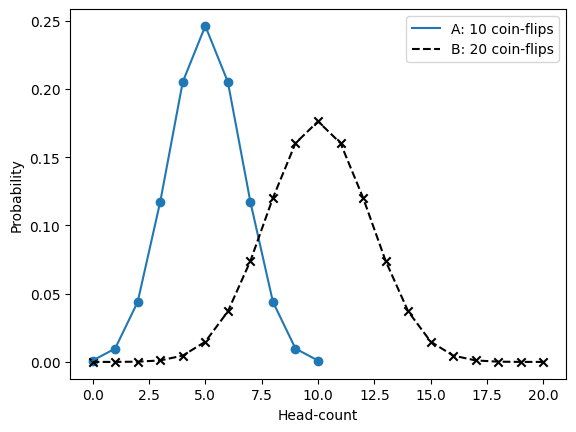

In [47]:
plt.plot(x_10_flips, prob_x_10_flips, label='A: 10 coin-flips')
plt.scatter(x_10_flips, prob_x_10_flips)
plt.plot(x_20_flips, prob_x_20_flips, color='black', linestyle='--',
        label='B: 20 coin-flips')
plt.scatter(x_20_flips, prob_x_20_flips, color='k', marker='x')
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.legend()
plt.show()

We’ve visualized our 2 distributions. Next, we’ll proceed to highlight our interval of interest (80% of heads or tails) across each of the 2 plotted curves.

**Listing 2. 14. Highlighting intervals beneath two plotted distributions.**

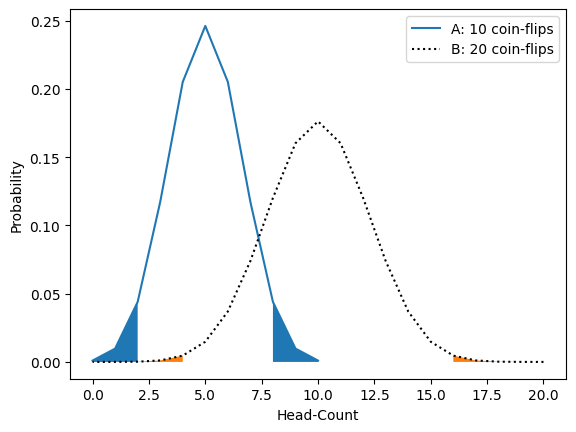

In [48]:
plt.plot(x_10_flips, prob_x_10_flips, label='A: 10 coin-flips')
plt.plot(x_20_flips, prob_x_20_flips, color='k', linestyle=':',
         label='B: 20 coin-flips')

where_10 = [not is_in_interval(value, 3, 7) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where_10)
where_20 = [not is_in_interval(value, 5, 15) for value in x_20_flips]
plt.fill_between(x_20_flips, prob_x_20_flips, where=where_20)

plt.xlabel('Head-Count')
plt.ylabel('Probability')
plt.legend()
plt.show()

Lets improve the visualization by aligning the distribution peaks. If we convert the head-counts into frequencies (by
dividing by the total coin flips), then both the distribution peaks should align at a frequency of 0.5.

**Listing 2. 15. Converting head-counts into frequencies**

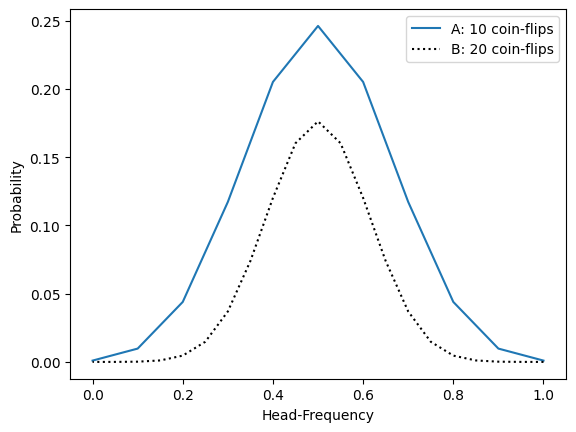

In [49]:
x_10_frequencies = [head_count / 10 for head_count in x_10_flips]
x_20_frequencies = [head_count / 20 for head_count in x_20_flips]

plt.plot(x_10_frequencies, prob_x_10_flips, label='A: 10 coin-flips')
plt.plot(x_20_frequencies, prob_x_20_flips, color='k', linestyle=':', label='B: 20 coin-flips')
plt.legend()

plt.xlabel('Head-Frequency')
plt.ylabel('Probability')
plt.show()

The 2 peaks now align. However, the total area beneath each curve no longer equals 1.0. We’ll need to force the aligned curve-areas to equal 1.0 prior to doing interval comparison. The adjusted y-values will no longer be probabilities. They will become **relative likelihoods**.

**Listing 2. 16. Computing relative likelihoods of frequencies**

In [50]:
relative_likelihood_10 = [10 * prob for prob in prob_x_10_flips]
relative_likelihood_20 = [20 * prob for prob in prob_x_20_flips]

**Listing 2. 17. Plotting aligned relative likelihood curves**

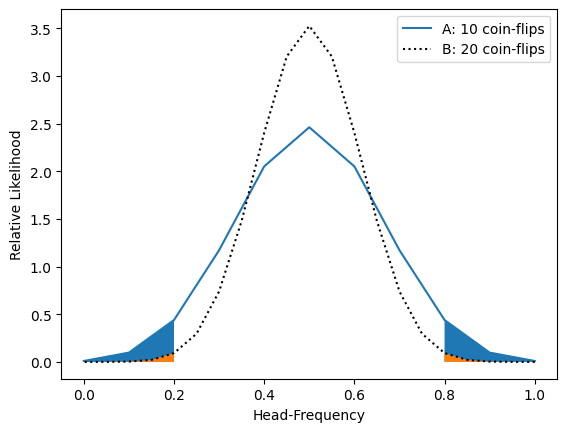

In [51]:
plt.plot(x_10_frequencies, relative_likelihood_10, label='A: 10 coin-flips')
plt.plot(x_20_frequencies, relative_likelihood_20, color='k',
         linestyle=':', label='B: 20 coin-flips')

plt.fill_between(x_10_frequencies, relative_likelihood_10, where=where_10)
plt.fill_between(x_20_frequencies, relative_likelihood_20, where=where_20)

plt.legend()
plt.xlabel('Head-Frequency')
plt.ylabel('Relative Likelihood')
plt.show()

Curve A covers a larger area over more extreme head-frequency intervals. Hence, observed recordings of such frequencies are more likely to occur when the coin-flip count is 10 and not 20.

# 3. Running Random Simulations in NumPy
## 3.1. Simulating Random Coin-Flips and Die-Rolls Using NumPy
Lets import the NumPy numerical computing library.

**Listing 3. 1. Importing NumPy**

In [52]:
import numpy as np

We can carry out random simulations using the `np.random` module. Calling `np.random.randint(1, 7)` will simulate a single roll of a standard die.

**Listing 3. 2. Simulating a randomly rolled die**

In [53]:
die_roll = np.random.randint(1, 6)
assert 1 <= die_roll <= 6

We’ll need a way of ensuring that all our random outputs can be reproduced at home. Conveniently, consistency can easily be maintained by calling `np.random.seed(0)`.

**Listing 3. 3. Seeding reproducible random die-rolls**

In [54]:
np.random.seed(0)
die_rolls = [np.random.randint(1, 7) for _ in range(3)]
assert die_rolls == [5, 6, 1]

We’ll now use `np.random.randint(0, 2)` to simulate a single flip of an unbiased
coin.

**Listing 3. 4. Simulating one fair coin-flip**

In [55]:
np.random.seed(0)
coin_flip = np.random.randint(0, 2)
print(f"Coin landed on {'heads' if coin_flip == 1 else 'tails'}")

Coin landed on tails


Next, we’ll simulate a sequence of 10 coin-flips, and then compute the observed frequency of heads.

**Listing 3. 5. Simulating 10 fair coin-flips**

In [56]:
np.random.seed(0)
def frequency_heads(coin_flip_sequence):
    total_heads = len([head for head in coin_flip_sequence if head == 1])
    return total_heads / len(coin_flip_sequence)

coin_flips = [np.random.randint(0, 2) for _ in range(10)]
freq_heads = frequency_heads(coin_flips)
print(f"Frequency of Heads is {freq_heads}")

Frequency of Heads is 0.8


Lets see what happens when we flip the coin 1000 times. After each flip, we will record the total frequency of heads observed in the sequence. Once the coin-flips are completed, we will plot the results.

**Listing 3. 6. Plotting simulated fair coin-flip frequencies**

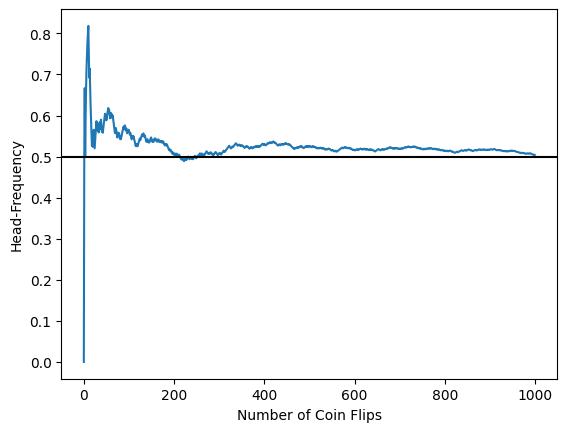

In [57]:
np.random.seed(0)
coin_flips = []
frequencies = []
for _ in range(1000):
    coin_flips.append(np.random.randint(0, 2))
    frequencies.append(frequency_heads(coin_flips))

plt.plot(list(range(1000)), frequencies)
plt.axhline(0.5, color='k')
plt.xlabel('Number of Coin Flips')
plt.ylabel('Head-Frequency')
plt.show()

The probability of heads slowly converges to 0.5.

### 3.1.1. Analyzing Biased Coin-Flips
Lets simulate a coin that falls on heads 70% of the time? We'll generate that biased output by calling `np.random.binomial(1, .7)`.

**Listing 3. 7. Simulating biased coin-flips**

In [58]:
np.random.seed(0)
print("Lets flip the biased coin once.")
coin_flip = np.random.binomial(1, 0.7)
print(f"Biased coin landed on {'heads' if coin_flip == 1 else 'tails'}.")

print("\nLets flip the biased coin 10 times.")
number_coin_flips = 10
head_count = np.random.binomial(number_coin_flips, .7)
print((f"{head_count} heads were observed out of "
       f"{number_coin_flips} biased coin flips"))

Lets flip the biased coin once.
Biased coin landed on heads.

Lets flip the biased coin 10 times.
6 heads were observed out of 10 biased coin flips


Lets generate a sequence of 1000 biased coin-flips. We’ll then check if the frequency converges to 0.7.

**Listing 3. 8. Computing coin-flip frequency convergence**

In [59]:
np.random.seed(0)
head_count = np.random.binomial(1000, .7)
frequency = head_count / 1000
print(f"Frequency of Heads is {frequency}")

Frequency of Heads is 0.697


The frequency is .03 units smaller than the true probability of heads. Suppose we recompute the frequency of 1000 coin-flips five more times. Will any of the frequencies be equal to 0.7?

**Listing 3. 9. Re-computing coin-flip frequency convergence**

In [60]:
np.random.seed(0)
assert np.random.binomial(1000, 0.7) / 1000 == 0.697
for i in range(1, 6):
    head_count = np.random.binomial(1000, .7)
    frequency = head_count / 1000
    print(f"Frequency at iteration {i} is {frequency}")
    if frequency == 0.7:
        print("Frequency equals the probability!\n")

Frequency at iteration 1 is 0.69
Frequency at iteration 2 is 0.7
Frequency equals the probability!

Frequency at iteration 3 is 0.707
Frequency at iteration 4 is 0.702
Frequency at iteration 5 is 0.699


Just one out the 5 iterations produced a measurement that equaled the real probability. The observed frequency appears to fluctuate over every sampling of 1000 coin-flips.

## 3.2. Computing Confidence Intervals Using Histograms and NumPy Arrays
We’ve previously sampled our coin over 5 iterations of 1000 coin-flips each. The sampling produced some fluctuations in the frequency. Lets explore these fluctuations by increasing our frequency count from 5 to 500.

**Listing 3. 10. Computing frequencies with 500 flips-per-sample**

In [61]:
np.random.seed(0)
head_count_list = [np.random.binomial(1000, 0.7) for _ in range(500)]

We can more efficiently sample over 500 iterations by running `np.random.binomial(coin_flip_count, 0.7, size=500)`.

**Listing 3. 11. Optimizing the coin-flip frequency computation**

In [62]:
np.random.seed(0)
head_count_array = np.random.binomial(1000, 0.7, 500)

The output is not a Python list, but a NumPy array data-structure. The actual numeric quantities stored
with both `head_count_array` and `head_count_list` remain the same.

**Listing 3. 12. Converting a NumPy array to a Python list**

In [63]:
assert head_count_array.tolist() == head_count_list

We can also convert our Python list into a value-equivalent NumPy array by calling np.array(head_count_list).

**Listing 3. 13. Converting a Python list to a NumPy array**

In [64]:
new_array = np.array(head_count_list)
assert np.array_equal(new_array, head_count_array) == True

Dividing a NumPy array by some number will automatically divide all array elements by that number. Thus, executing `head_count_array / 1000` will automatically transform our head-counts into frequencies.

**Listing 3. 14. Computing frequencies using NumPy**

In [65]:
frequency_array = head_count_array / 1000
assert frequency_array.tolist() == [head_count / 1000
                                    for head_count in head_count_list]
assert frequency_array.tolist() == list(map(lambda x: x / 1000,
                                        head_count_list))

Lets explore the contents of `frequency_array` in greater detail. We’ll start by printing the first 20 sampled frequencies within the array.

**Listing 3. 15. Printing a NumPy frequency array**

In [66]:
print(frequency_array[:20])

[0.697 0.69  0.7   0.707 0.702 0.699 0.723 0.67  0.702 0.713 0.721 0.689
 0.711 0.697 0.717 0.691 0.731 0.697 0.722 0.728]


Now, lets extract the minimum and maximum frequencies values by calling the `frequency_array.min()` and
`frequency_array.max()` array methods.

**Listing 3. 16. Finding the largest and smallest frequency values**

In [67]:
min_freq = frequency_array.min()
max_freq = frequency_array.max()
print(f"Minimum frequency observed: {min_freq}")
print(f"Maximum frequency observed: {max_freq}")
print(f"Difference across frequency range: {max_freq - min_freq}")

Minimum frequency observed: 0.656
Maximum frequency observed: 0.733
Difference across frequency range: 0.07699999999999996


Somewhere between the frequency range of 0.656 to 0.733 lies the true probability of
heads. How can we rationally narrow the frequency range? Plotting the data could help.

**Listing 3. 17. Plotting measured frequencies**

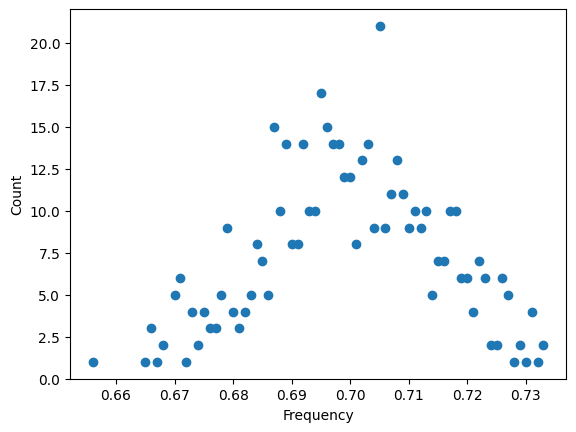

In [68]:
frequency_counts = defaultdict(int)
for frequency in frequency_array:
    frequency_counts[frequency] += 1

frequencies = list(frequency_counts.keys())
counts = [frequency_counts[freq] for freq in frequencies]
plt.scatter(frequencies, counts)
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

Our plot is somewhat flawed, since values that are very close get counted separately. Perhaps instead of treating these values as individual points, we should group such proximate frequencies together.

### 3.2.1. Binning Similar Points in Histogram Plots

We’ll sub-divide our frequency range into N equally spaced bins, and then place all frequency values into one of those bins.  Afterwards, we’ll count the total values in each bin, and visualize the counts using a plot. This type of **histogram** plot can be carried out using the `plt.hist` method.

**Listing 3. 18. Plotting a frequency histogram using plt.hist**

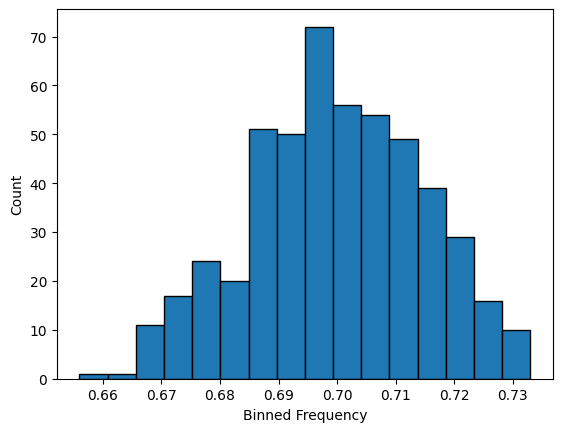

In [69]:
plt.hist(frequency_array, bins='auto', edgecolor='black')
plt.xlabel('Binned Frequency')
plt.ylabel('Count')
plt.show()

The total count of bins within the plot is not yet known. However, we can obtain that information using `counts`, which is a NumPy array returned by `plt.hist`.

**Listing 3. 19. Counting bins in a plotted histogram**

Number of Bins: 16


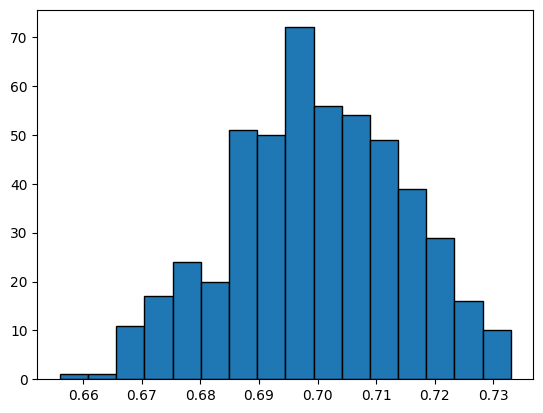

In [70]:
counts, _, _ = plt.hist(frequency_array, bins='auto',
                        edgecolor='black')

print(f"Number of Bins: {counts.size}")

How wide is each bin? To find out, we'll leverage the `bin_edges` array, which is the second variable
returned by `plt.hist`.

**Listing 3. 20. Finding the width of bins within a histogram**

Bin width: 0.004812499999999997


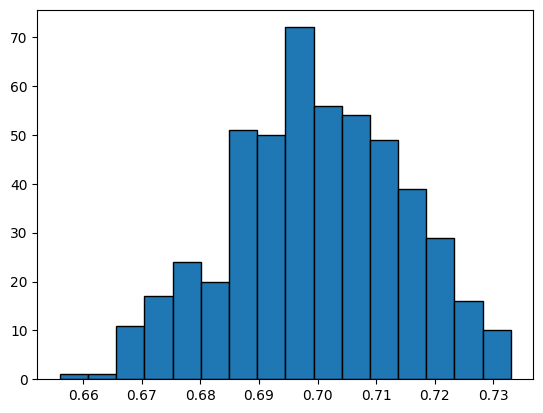

In [71]:
counts, bin_edges, _ = plt.hist(frequency_array, bins='auto',
                                edgecolor='black')

bin_width = bin_edges[1] - bin_edges[0]
assert bin_width == (max_freq - min_freq) / counts.size
print(f"Bin width: {bin_width}")

The `bin_edges` array can be used in tandem with `counts` to output the element-count and
coverage-range for any specified bin.

**Listing 3. 21. Getting a bin’s frequency and size**

In [72]:
def output_bin_coverage(i):
    count = int(counts[i])
    range_start, range_end = bin_edges[i], bin_edges[i+1]
    range_string = f"{range_start} - {range_end}"
    print((f"The bin for frequency range {range_string} contains "
           f"{count} element{'' if count == 1 else 's'}"))

output_bin_coverage(0)
output_bin_coverage(5)

The bin for frequency range 0.656 - 0.6608125 contains 1 element
The bin for frequency range 0.6800625 - 0.684875 contains 20 elements


Let’s compute the count and frequency range for the highest peak within our histogram. Conveniently, NumPy arrays have a built-in `argmax` method, which returns the index of the maximum value within a given array.

**Listing 3. 22. Finding the index of an array’s maximum value**

In [73]:
assert counts[counts.argmax()] == counts.max()

Thus, calling `output_bin_coverage(counts.argmax())` should provide us with the output we’ve requested.

**Listing 3. 23. Using `argmax` to return a histogram’s peak**

In [74]:
output_bin_coverage(counts.argmax())

The bin for frequency range 0.6945 - 0.6993125 contains 72 elements


### 3.2.2. Deriving Probabilities from Histograms
We wish to calculate the likelihood that a randomly measured frequency falls within 0.694 - 0.699. The likelihood of an interval equals its area under a curve, but only when the total plotted area sums up to 1.0. We thus must modify our histogram by transforming the counts into relative likelihoods.

**Listing 3. 24. Plotting a histogram’s relative likelihoods**

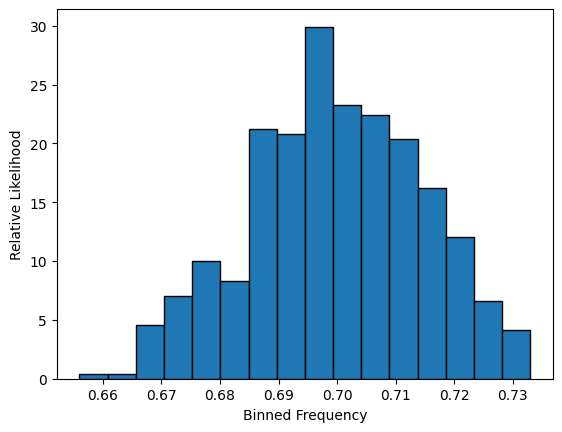

In [75]:
likelihoods, bin_edges, _ = plt.hist(frequency_array, bins='auto', edgecolor='black', density=True)
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')
plt.show()

The total area beneath our histogram now sums to 1.0.

**Listing 3. 25. Computing the total area under a histogram**

In [76]:
assert likelihoods.sum() * bin_width == 1.0

Thus, the area beneath the histogram’s peak is now a probability. We can compute that probability by calculating the area of the bin positioned at `likelihoods.argmax()`.

**Listing 3. 26. Computing the probability of the peak frequencies**

In [77]:
index = likelihoods.argmax()
area = likelihoods[index] * bin_width
range_start, range_end = bin_edges[index], bin_edges[index+1]
range_string = f"{range_start} - {range_end}"
print(f"Sampled frequency falls within interval {range_string} with probability {area}")

Sampled frequency falls within interval 0.6945 - 0.6993125 with probability 0.144


The probability is low, but we can raise it by expanding our interval range beyond one bin. We’ll stretch the range to cover neighboring bins at `indices likelihoods.argmax() - 1` and `likelihoods.argmax() + 1`.

**Listing 3. 27. Raising the probability of a frequency range**

In [78]:
peak_index = likelihoods.argmax()
start_index, end_index = (peak_index - 1, peak_index + 2)
area = likelihoods[start_index: end_index + 1].sum() * bin_width
range_start, range_end = bin_edges[start_index], bin_edges[end_index]
range_string = f"{range_start} - {range_end}"
print(f"Sampled frequency falls within interval {range_string} with probability {area}")

Sampled frequency falls within interval 0.6896875 - 0.704125 with probability 0.464


These three bins represent what statisticians call a 46.4% **confidence interval**. Ideally, we’d prefer a confidence interval of 95% or more. We’ll reach that confidence interval by iteratively expanding our left-most bin and right-most bin until the interval area stretches past 0.95.

**Listing 3. 28. Computing a high confidence interval**

In [79]:
def compute_high_confidence_interval(likelihoods, bin_width):
    peak_index = likelihoods.argmax()
    area = likelihoods[peak_index] * bin_width
    start_index, end_index = peak_index, peak_index + 1
    while area < 0.95:
        if start_index > 0:
            start_index -= 1
        if end_index < likelihoods.size - 1:
            end_index += 1

        area = likelihoods[start_index: end_index + 1].sum() * bin_width

    range_start, range_end = bin_edges[start_index], bin_edges[end_index]
    range_string = f"{range_start:.6f} - {range_end:.6f}"
    print((f"The frequency range {range_string} represents a "
           f"{100 * area:.2f}% confidence interval"))
    return start_index, end_index

compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.670438 - 0.723375 represents a 95.40% confidence interval


(np.int64(3), np.int64(14))

From our analysis, we’re fairly confident that the true probability lies somewhere between 0.670 and 0.723.

### 3.2.3. Shrinking the Range of a High Confidence Interval
How can we taper down our range while still maintaining a 95% confidence interval? Perhaps we should try elevating the frequency count from 500 to 100,000.

**Listing 3. 29. Sampling 100,000 frequencies**

In [80]:
np.random.seed(0)
head_count_array = np.random.binomial(1000, 0.7, 100000)
frequency_array = head_count_array / 1000
assert frequency_array.size == 100000

We will re-compute the histogram on the updated `frequency_array`. Afterwards, we’ll visualize that histogram while also searching for a high confidence interval. Lets incorporate the confidence interval into our visualization by coloring the histogram bars within its range.

**Listing 3. 30. Coloring histogram bars over an interval**

The frequency range 0.670429 - 0.727857 represents a 95.42% confidence interval


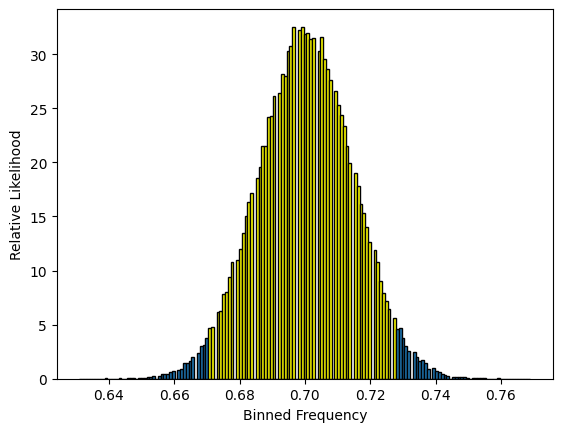

In [81]:
likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto',
                                           edgecolor='black', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods,
                                                          bin_width)

for i in range(start_index, end_index):
     patches[i].set_facecolor('yellow')
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')

plt.show()

The new frequency range is nearly identical to the one we saw before. Raising the sampling size
from 500 to 100,000 appears to have done little to reduce the range. Perhaps we should’ve also raised the number of coin-flips per frequency-sample.  Lets increase this value 50-fold to 50,000 coin-flips per sampled frequency.

**Listing 3. 31. Sampling 5 billion flipped coins**

The frequency range 0.695769 - 0.703708 represents a 95.06% confidence interval


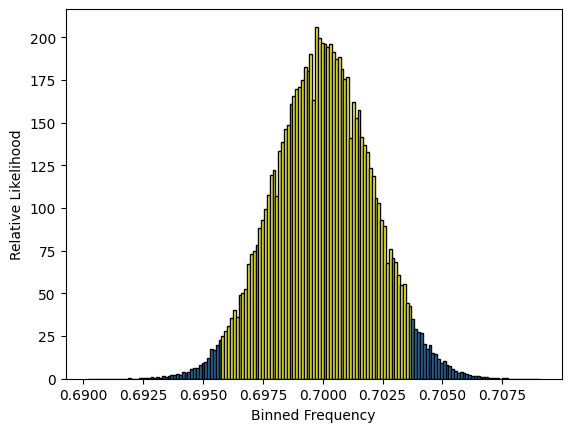

In [82]:
np.random.seed(0)
head_count_array = np.random.binomial(50000, 0.7, 100000)
frequency_array = head_count_array / 50000

likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto',
                                           edgecolor='black', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

for i in range(start_index, end_index):
     patches[i].set_facecolor('yellow')
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')

plt.show()

The new 95.06% confidence interval covers a frequency range of roughly 0.695 - 0.703. We are thus exceedingly confident that our true probability is approximately 0.70.

### 3.2.4. Computing Histograms in NumPy
Calling the `plt.hist` method will automatically generate a histogram plot. Can we obtain the histogram likelihoods and bin-edges without creating a plot? Yes; we simply need to call `np.histogram.`

**Listing 3. 32. Computing a histogram using `np.histogram`**

In [83]:
np.random.seed(0)

likelihoods, bin_edges = np.histogram(frequency_array, bins='auto',
                                      density=True)
bin_width = bin_edges[1] - bin_edges[0]
compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.695769 - 0.703708 represents a 95.06% confidence interval


(np.int64(47), np.int64(114))

## 3.3. Leveraging Confidence Intervals to Analyze a Biased Deck of Cards
Lets model a deck containing a hidden quantity of red cards. The total size of that deck is 52. The number of red cards in the deck is some unknown integer between zero and 52. We'll generate that integer using the `np.random.randint` method.

**Listing 3. 33. Generating a random red card count**

In [84]:
np.random.seed(0)
total_cards = 52
red_card_count = np.random.randint(0, total_cards + 1)

Now lets assign a value to `black_card_count`.

**Listing 3. 34. Generating a black card count**

In [85]:
black_card_count = total_cards - red_card_count
assert black_card_count != red_card_count

What is the probability that the first card will be red? Well, our card deck is biased, and the outcomes are not equally likely. Thus, a weighted sample space dictionary is required to compute the probability.

**Listing 3. 35. Computing card probabilities using a sample space**

In [86]:
weighted_sample_space = {'red_card': red_card_count,
                         'black_card': black_card_count}
prob_red = compute_event_probability(lambda x: x == 'red_card',
                                     weighted_sample_space)

Also, we can easily show that the probability of drawing a red card is equal to `red_card_count` divided by `total_cards`.

**Listing 3. 36. Computing card probabilities using division**

In [87]:
assert prob_red == red_card_count / total_cards

We'll utilize `prob_red` to model a flipped-over first card using the Binomial distribution.

**Listing 3. 37. Simulating a random card**

In [88]:
np.random.seed(0)
color = 'red' if np.random.binomial(1, prob_red) else 'black'
print(f"The first card in the shuffled deck is {color}")

The first card in the shuffled deck is red


We’ll proceed to shuffle the deck 10 times, and flip over the first card after each shuffle.

**Listing 3. 38. Simulating 10 random cards**

In [89]:
np.random.seed(0)
red_count = np.random.binomial(10, prob_red)
print(f"In {red_count} of out 10 shuffles, a red card came up first.")

In 8 of out 10 shuffles, a red card came up first.


Lets now shuffle now shuffle the deck 50,000 times. Afterwards, lets compute the frequency and then re-do the shuffling procedure another 100,000 times. We use the resulting frequencies to compute a 95% confidence interval for flipping over a red card.

**Listing 3. 39. Computing card-probability confidence intervals**

In [90]:
np.random.seed(0)
red_card_count_array = np.random.binomial(50000, prob_red, 100000)
frequency_array = red_card_count_array / 50000

likelihoods, bin_edges = np.histogram(frequency_array, bins='auto',
                                      density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.842865 - 0.849139 represents a 95.16% confidence interval


We are highly confident that red_card_count lies between `0.842865 * total_cards` and `0.849139 *
total_cards`. Let’s compute the likely range of `red_card_count`.

**Listing 3. 40. Estimating the red card count**

In [91]:
range_start = round(0.842865 * total_cards)
range_end = round(0.849139 * total_cards)
print(f"The number of red cards in the deck is between {range_start} and {range_end}")

The number of red cards in the deck is between 44 and 44


We are very confident that there are 44 red cards in the deck. Lets check if our solution is
correct.

**Listing 3. 41. Validating the red card count**

In [92]:
if red_card_count == 44:
    print('We are correct! There are 44 red cards in the deck')
else:
    print('Oops! Our sampling estimation was wrong.')

We are correct! There are 44 red cards in the deck


## 3.4. Using Permutations to Shuffle Cards
Card-shuffling requires us to randomly re-order the elements of a card-deck. That random
re-ordering can be carried out using the `np.random.shuffle` method.

**Listing 3. 42. Shuffling a 4-card deck**

In [93]:
np.random.seed(0)
card_deck = [1, 1, 0, 0]
np.random.shuffle(card_deck)
print(card_deck)

[0, 0, 1, 1]


If we prefer to carry out the shuffle while retaining a copy of the original unshuffled deck, we can do so using
`np.random.permutation`.

**Listing 3. 43. Returning a copy of the shuffled deck**

In [94]:
np.random.seed(0)
unshuffled_deck = [1, 1, 0, 0]
shuffled_deck = np.random.permutation(unshuffled_deck)
assert unshuffled_deck == [1, 1, 0, 0]
print(shuffled_deck)

[0 0 1 1]


The random ordering of elements returned by `np.random.permutation` is mathematically called a **permutation**. Calling `itertools.permutations(unshuffled_deck)` will return an iterable over every possible permutation of the deck.

**Listing 3. 44. Iterating over card permutations**

In [95]:
import itertools
for permutation in list(itertools.permutations(unshuffled_deck))[:3]:
    print(permutation)

(1, 1, 0, 0)
(1, 1, 0, 0)
(1, 0, 1, 0)


The first 2 generated permutations are identical to each other, because identical zeros were swapped by the `permutation` function. We can confirm the swap actually took place by examining the first
three permutations of `[0, 1, 2, 3]`.

**Listing 3. 45. Monitoring permutation swaps**

In [96]:
for permutation in list(itertools.permutations([0, 1, 2, 3]))[:3]:
    print(permutation)

(0, 1, 2, 3)
(0, 1, 3, 2)
(0, 2, 1, 3)


Certain permutations of the 4-card deck occur more than once.  Let’s store these permutation counts within a `weighted_sample_space` dictionary.

**Listing 3. 46. Computing permutation counts**

In [97]:
weighted_sample_space = defaultdict(int)
for permutation in itertools.permutations(unshuffled_deck):
    weighted_sample_space[permutation] += 1

for permutation, count in weighted_sample_space.items():
    print(f"Permutation {permutation} occurs {count} times")

Permutation (1, 1, 0, 0) occurs 4 times
Permutation (1, 0, 1, 0) occurs 4 times
Permutation (1, 0, 0, 1) occurs 4 times
Permutation (0, 1, 1, 0) occurs 4 times
Permutation (0, 1, 0, 1) occurs 4 times
Permutation (0, 0, 1, 1) occurs 4 times


All the permutations occur with equal frequency. Consequently, an unweighted sample space should be sufficient to compute permutation probabilities.

In [98]:
sample_space = set(itertools.permutations(unshuffled_deck))
event_condition = lambda x: list(x) == unshuffled_deck
prob = compute_event_probability(event_condition, sample_space)
assert prob == 1 / len(sample_space)
print(f"Probability that a shuffle does not alter the deck is {prob}")

Probability that a shuffle does not alter the deck is 0.16666666666666666


We can compute probabilities directly from the unweighted sample. Unfortunately, creating this sample space is not feasible for a deck of 52 cards. However, such a sample space could easily be computed for smaller deck of size 10.

**Listing 3. 48. Computing a 10-card sample space**

In [99]:
red_cards = 5 * [1]
black_cards = 5 * [0]
unshuffled_deck = red_cards + black_cards
sample_space = set(itertools.permutations(unshuffled_deck))
print(f"Sample space for a 10-card deck contains {len(sample_space)} elements")

Sample space for a 10-card deck contains 252 elements


# 4. Case Study 1 Solution
##  4.1. Overview
Our aim is to play a card-game in which the cards are iteratively flipped until we tell the
dealer to stop. Afterwards, one additional card is flipped. If that card is red, we win a dollar.
Otherwise, we lose a dollar.

## 4.2. Predicting Red Cards within a Shuffled Deck
We’ll start by creating a deck holding 26 red cards and 26 black cards. Black cards are
represented by zeroes and red cards are represented by ones.

**Listing 4. 1. Modeling a 52-card deck**

In [100]:
red_cards = 26 * [1]
black_cards = 26 * [0]
unshuffled_deck = red_cards + black_cards

We’ll proceed to shuffle the deck.

**Listing 4. 2. Shuffling a 52-card deck**

In [101]:
np.random.seed(1)
shuffled_deck = np.random.permutation(unshuffled_deck)

Now we’ll iteratively flip over the cards within the deck, stopping when the the number of red cards remaining in the deck is greater than the number of black cards remaining in the deck.

**Listing 4. 3. Coding a card-game strategy**

In [102]:
remaining_red_cards = 26
for i, card in enumerate(shuffled_deck[:-1]):
    remaining_red_cards -= card
    remaining_total_cards = 52 - i - 1
    if remaining_red_cards / remaining_total_cards > 0.5:
        break

print(f"Stopping the game at index {i}.")
final_card = shuffled_deck[i + 1]
color = 'red' if final_card else 0
print(f"The next card in the deck is {'red' if final_card else 'black'}.")
print(f"We have {'won' if final_card else 'lost'}!")

Stopping the game at index 0.
The next card in the deck is red.
We have won!


The strategy yielded a win on our very first try. Lets generalize this strategy to halt when the
fraction of remaining red cards is greater than an inputted `min_red_fraction` parameter.

**Listing 4. 4. Generalizing the card-game strategy**

In [103]:
total_cards = 52
total_red_cards = 26
def execute_strategy(min_fraction_red=0.5, shuffled_deck=None,
                     return_index=False):
    if shuffled_deck is None:
        shuffled_deck = np.random.permutation(unshuffled_deck)

    remaining_red_cards = total_red_cards

    for i, card in enumerate(shuffled_deck[:-1]):
        remaining_red_cards -= card
        fraction_red_cards = remaining_red_cards / (total_cards - i - 1)
        if fraction_red_cards > min_fraction_red:
            break

    return (i+1, shuffled_deck[i+1]) if return_index else shuffled_deck[i+1]

### 4.2.1. Estimating the Probability of Strategy Success
Lets apply our basic strategy to a series of 1000 random shuffles.

**Listing 4. 5. Running strategy over 1000 shuffles**

In [104]:
np.random.seed(0)
observations = np.array([execute_strategy() for _ in range(1000)])

The total fraction of ones in observations corresponds to the observed fraction of red cards, and therefore to the fraction of wins. We can compute this fraction by calling `observations.mean()`.

**Listing 4. 6. Computing the frequency of wins**

In [105]:
frequency_wins = observations.sum() / 1000
assert frequency_wins == observations.mean()
print(f"The frequency of wins is {frequency_wins}")

The frequency of wins is 0.511


We’ve won 51.1 percent of total games! Our strategy appears to be working. 524 wins and 76 losses will net us a total profit of $22.

**Listing 4. 7. Computing total profit**

In [106]:
dollars_won = frequency_wins * 1000
dollars_lost = (1 - frequency_wins) * 1000
total_profit = dollars_won - dollars_lost
print(f"Total profit is ${total_profit}")

Total profit is $22.0


The strategy worked well for a sample size of 1000 shuffles. We’ll now plot the strategy’s
win-frequency convergence over a series of sample sizes ranging from 1 to 10,000.

**Listing 4. 8. Plotting simulated frequencies of wins**

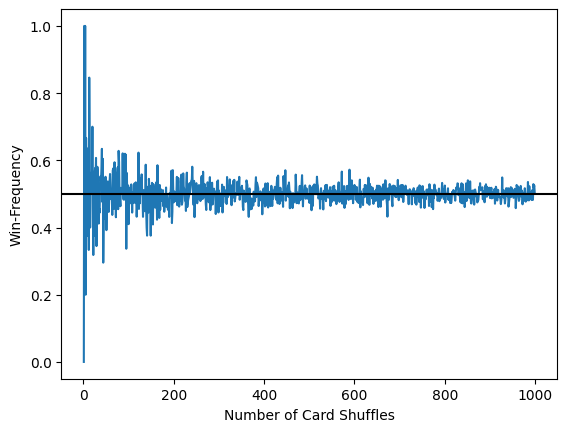

The win-frequency for 10,000 shuffles is 0.5035035035035035


In [107]:
np.random.seed(0)
def repeat_game(number_repeats):
    observations = np.array([execute_strategy()
                             for _ in range(number_repeats)])
    return observations.mean()

frequencies = []
for i in range(1, 1000):
    frequencies.append(repeat_game(i))

plt.plot(list(range(1, 1000)), frequencies)
plt.axhline(0.5, color='k')
plt.xlabel('Number of Card Shuffles')
plt.ylabel('Win-Frequency')
plt.show()
print(f"The win-frequency for 10,000 shuffles is {frequencies[-1]}")

Our strategy fluctuates above and below 50% through-out the entire sampling process. We'll need to compute a confidence interval to ensure that its win-rate is above 50%. We’ll compute the confidence interval by sampling 10,000 card-shuffles 300 times. Shuffling an array is a computationally expensive procedure. **The code below will take approximately 40 seconds to run. Hence, it has been commented out.**

**Listing 4. 9. Computing the confidence interval for 3 million shuffles**

In [108]:
"""
np.random.seed(0)
frequency_array = np.array([repeat_game(10000) for _ in range(300)])

likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto',
                                           edgecolor='black', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

for i in range(start_index, end_index):
     patches[i].set_facecolor('yellow')
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')
plt.show()
"""

"\nnp.random.seed(0)\nfrequency_array = np.array([repeat_game(10000) for _ in range(300)])\n\nlikelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto',\n                                           edgecolor='black', density=True)\nbin_width = bin_edges[1] - bin_edges[0]\nstart_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)\n\nfor i in range(start_index, end_index):\n     patches[i].set_facecolor('yellow')\nplt.xlabel('Binned Frequency')\nplt.ylabel('Relative Likelihood')\nplt.show()\n"

We can narrow the confidence interval by increasing the sample size, at the expense of running time. The code below will sample 50,000 shuffles over 3,000 iterations. **The code will take approximately one hour to run. Hence, it has been commented out.**

**Listing 4. 10. Computing the confidence interval for 150 million shuffles**

In [109]:
"""
np.random.seed(0)

frequency_array = np.array([repeat_game(50000) for _ in range(3000)])
likelihoods, bin_edges = np.histogram(frequency_array, bins='auto',
                                      density=True)
bin_width = bin_edges[1] - bin_edges[0]
compute_high_confidence_interval(likelihoods, bin_width)
"""

"\nnp.random.seed(0)\n\nfrequency_array = np.array([repeat_game(50000) for _ in range(3000)])\nlikelihoods, bin_edges = np.histogram(frequency_array, bins='auto',\n                                      density=True)\nbin_width = bin_edges[1] - bin_edges[0]\ncompute_high_confidence_interval(likelihoods, bin_width)\n"

We can also `min_red_fraction` from 0.5 to 0.75 and repeat the confidence interval calculation process. **As before, the code will take approximately one hour to run. Hence, it has been commented out.**

**Listing 4. 11. Computing the confidence interval for an updated strategy**

In [110]:
"""
np.random.seed(0)
def repeat_game(number_repeats, min_red_fraction):
    observations = np.array([execute_strategy(min_red_fraction)
                            for _ in range(number_repeats)])
    return observations.mean()

frequency_array = np.array([repeat_game(50000, 0.75) for _ in range(3000)])
likelihoods, bin_edges = np.histogram(frequency_array, bins='auto',
                                      density=True)
bin_width = bin_edges[1] - bin_edges[0]
compute_high_confidence_interval(likelihoods, bin_width)
"""

"\nnp.random.seed(0)\ndef repeat_game(number_repeats, min_red_fraction):\n    observations = np.array([execute_strategy(min_red_fraction)\n                            for _ in range(number_repeats)])\n    return observations.mean()\n\nfrequency_array = np.array([repeat_game(50000, 0.75) for _ in range(3000)])\nlikelihoods, bin_edges = np.histogram(frequency_array, bins='auto',\n                                      density=True)\nbin_width = bin_edges[1] - bin_edges[0]\ncompute_high_confidence_interval(likelihoods, bin_width)\n"

## 4.3. Optimizing Strategies using the Sample Space for a 10-Card Deck
The code below computes the sample space for a 10-card deck. Afterwards, it applies our
basic strategy to that sample space. Its output is the probability of a win.

**Listing 4. 12. Applying a basic strategy to a 10-card deck**

In [111]:
total_cards = 10
total_red_cards = int(total_cards / 2)
total_black_cards = total_red_cards
unshuffled_deck = [1] * total_red_cards + [0] * total_black_cards
sample_space = set(itertools.permutations(unshuffled_deck))
win_condition = lambda x: execute_strategy(shuffled_deck=np.array(x))
prob_win = compute_event_probability(win_condition, sample_space)
print(f"Probability of a win is {prob_win}")

Probability of a win is 0.5


Surprisingly, our basic strategy yields a win only 50% of the time. Lets compute the win-probabilities over a range
of min_red_fraction values.

**Listing 4. 13. Applying multiple strategies to a 10-card deck**

In [112]:
def scan_strategies():
    fractions = [value / 100 for value in range(50, 100)]
    probabilities = []
    for frac in fractions:
        win_condition = lambda x: execute_strategy(frac,
                                                   shuffled_deck=np.array(x))
        probabilities.append(compute_event_probability(win_condition,
                                                       sample_space))
    return probabilities

probabilities = scan_strategies()
print(f"Lowest probability of win is {min(probabilities)}")
print(f"Highest probability of win is {max(probabilities)}")

Lowest probability of win is 0.5
Highest probability of win is 0.5


Both the lowest and highest probabilities are equal to 0.5! Perhaps adjusting the deck size will yield some
improvement. Let’s analyze the sample spaces of decks containing 2, 4, 6, and 8 cards.

**Listing 4. 14. Applying multiple strategies to multiple decks**

In [113]:
for total_cards in [2, 4, 6, 8]:
    total_red_cards = int(total_cards / 2)
    total_black_cards = total_red_cards
    unshuffled_deck = [1] * total_red_cards + [0] * total_black_cards

    sample_space = set(itertools.permutations(unshuffled_deck))
    probabilities = scan_strategies()
    if all(prob == 0.5 for prob in probabilities):
        print(f"No winning strategy found for deck of size {total_cards}")
    else:
        print(f"Winning strategy found for deck of size {total_cards}")

No winning strategy found for deck of size 2
No winning strategy found for deck of size 4
No winning strategy found for deck of size 6
No winning strategy found for deck of size 8


All of the strategies yield a probability of 0.5 across the small decks. Our strategies don’t work on a 10-card deck, and we have little reason to believe that they will work on a 52-card deck. To better understand why this is the case, we can re-run our simulations over a 52 card deck while plotting wins and losses relative to halting and non-halting scenarios.

**Listing 4. 15. Plotting strategy outcomes across a 52-card deck**

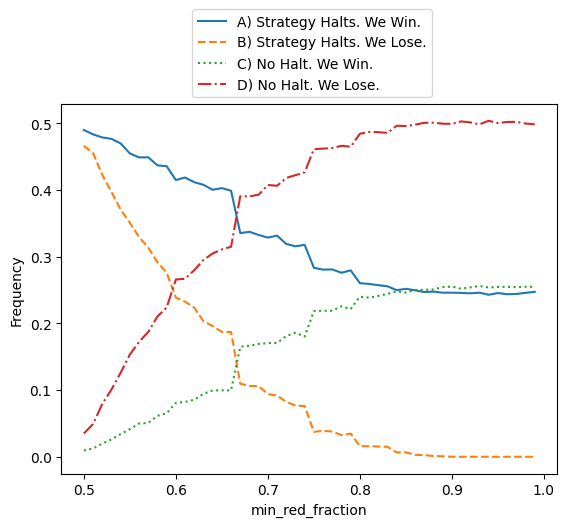

In [114]:
np.random.seed(0)
total_cards = 52
total_red_cards = 26
unshuffled_deck = red_cards + black_cards

def repeat_game_detailed(number_repeats, min_red_fraction):

    observations = [execute_strategy(min_red_fraction, return_index=True)
                    for _ in range(num_repeats)]
    successes = [index for index, card, in observations if card == 1]
    halt_success = len([index for index in successes if index != 51])
    no_halt_success = len(successes) - halt_success

    failures = [index for index, card, in observations if card == 0]
    halt_failure = len([index for index in failures if index != 51])
    no_halt_failure = len(failures) - halt_failure
    result = [halt_success, halt_failure, no_halt_success, no_halt_failure]
    return [r / number_repeats for r in result]

fractions = [value / 100 for value in range(50, 100)]
num_repeats = 50000
result_types = [[], [], [], []]

for fraction in fractions:
    result = repeat_game_detailed(num_repeats, fraction)
    for i in range(4):
        result_types[i].append(result[i])

plt.plot(fractions, result_types[0],
         label='A) Strategy Halts. We Win.')
plt.plot(fractions, result_types[1], linestyle='--',
         label='B) Strategy Halts. We Lose.')
plt.plot(fractions, result_types[2], linestyle=':',
         label='C) No Halt. We Win.')
plt.plot(fractions, result_types[3], linestyle='-.',
         label='D) No Halt. We Lose.')
plt.xlabel('min_red_fraction')
plt.ylabel('Frequency')
plt.legend(bbox_to_anchor=(0.25, 1.0))
plt.show()

The added frequencies of Scenarios A and B appear to fluctuate at around 0.5. No matter what we do, our likelihood of winning remains 50-50. Therefore, the most optimal strategy we can offer is to pick the first card in the shuffled deck.

**Listing 4. 16. The most optimal winning strategy**

In [115]:
def optimal_strategy(shuffled_deck):
    return shuffled_deck[0]